In [29]:
import pandas as pd

In [30]:
import matplotlib.pyplot as plt

In [31]:
import datetime

In [32]:
!pip install chardet


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [33]:
import chardet

In [34]:
juegos = pd.read_csv("juegos.csv", encoding="latin1")



In [35]:
ruta="jugadores.csv"

with open(ruta, "rb") as f:
    resultado = chardet.detect(f.read(100000))

print("Codificación detectada:", resultado['encoding'])

Codificación detectada: ISO-8859-1


In [36]:
jugadores = pd.read_csv("jugadores.csv", encoding="ISO-8859-1")
sesiones = pd.read_csv("sesiones.csv", encoding="latin1")
puntuaciones = pd.read_csv("puntuaciones.csv", encoding="latin1")
compras = pd.read_csv("compras_en_plataforma.csv", encoding="latin1")

# JUEGOS

In [37]:
juegos.head()


,id_juego,nombre,categoria,fecha_lanzamiento,puntaje_global
0,1,Assassin's Creed IV: Black Flag 1,AcciÃ³n/Aventur,2013,8.191430
1,2,Far Cry 3 1,AcciÃ³n/Aventur,2012,83.068108
2,3,For Honor 1,Lucha,2017,19.514254
3,4,Rayman Origins 1,Plataformas,2011,73.511024
4,5,Watch Dogs 1,AcciÃ³n/Aventur,2014,60.060021


In [38]:
juegos.shape

(350, 5)

In [39]:
juegos.dtypes

id_juego               int64
nombre                object
categoria             object
fecha_lanzamiento     object
puntaje_global       float64
dtype: object

### Fecha de lanzamiento

In [40]:
juegos["fecha_lanzamiento"].unique()

array(['2013', '2012', '2017', '2011', '2014', '2019', '2020', '2003',
       'En desarrollo', 'Pendiente', 'No publicado', '2023', '2021',
       '2025', 'No disponible', '2024', '2022',
       '2013 (original), re-lanzado 2021', '2018', '2001', nan, '2016',
       '2015', '20.13', '1989', '2010', '2009', '2008', '1999'],
      dtype=object)

In [41]:
juegos.loc[juegos["fecha_lanzamiento"]=="20.13", "fecha_lanzamiento"]=2013

In [42]:
juegos.loc[juegos["fecha_lanzamiento"]=="2013"].head()

,id_juego,nombre,categoria,fecha_lanzamiento,puntaje_global
0,1,Assassin's Creed IV: Black Flag 1,AcciÃ³n/Aventur,2013,8.191430
40,41,The Settlers : New Allies para Ordenador 1,Estrategia,2013,9.103704
92,93,South Park: Phone Destroyer para Android 1,Estrategia/Rol,2013,60.054845
150,151,Los Pitufos eShop 1,Aventura,2013,59.661845
151,152,Anno Online 1,Estrategia/GestiÃ³,2013,15.198456


In [43]:
juegos[juegos["fecha_lanzamiento"]=="2013 (original), re-lanzado 2021"]

,id_juego,nombre,categoria,fecha_lanzamiento,puntaje_global
55,56,TRIVIAL PURSUIT Live! 2 para PlayStation 4 1,Preguntas y respuestas,"2013 (original), re-lanzado 2021",21.763576


In [44]:
reemplazos_nombre={
    "Diseï¿½ï¿½adora": "disenadora"
}

In [45]:
for mal, bien in reemplazos_nombre.items():
    juegos['nombre'] = juegos['nombre'].str.replace(mal, bien, regex=False)


### Categoria

In [46]:
juegos["categoria"].unique()

array(['AcciÃ³n/Aventur', 'Lucha', 'Plataformas', 'Rol/Disparos', 'Rol',
       'Disparos tÃ¡ctico', 'Plataforma de servicios', 'Rol/AcciÃ³',
       'Sigilo/AcciÃ³', 'Estrategia', 'Estrategia/Rol', 'AcciÃ³',
       'Disparos', 'Lucha/Plataformas', 'Musical/SimulaciÃ³',
       'AcciÃ³n/Plataforma', 'Musical/Ritmo', 'Tablero/Estrategia',
       'Deportes/Fiesta', 'Estrategia/Cartas', 'Plataformas/Roguelite',
       'Sandbox/Multijugador', 'Disparos/Estrategia',
       'Plataformas/Metroidvania', 'Carreras', 'Aventura', 'Educativo',
       'Preguntas y respuestas', 'SimulaciÃ³', 'Cartas',
       'Carreras/Plataformas', 'Juegos de mesa', 'Misterio/Puzles',
       'Pesca', 'SimulaciÃ³n/Aventur', 'Realidad Virtual',
       'Deportes extremos', 'Realidad Virtual/Vuelo', 'Fiesta/Minijuegos',
       'Musical/Canto', 'Plataformas/Aventura', 'AcciÃ³n/Arcad',
       'AcciÃ³n/Ro', 'Plataformas/AcciÃ³', 'Aventura/Plataformas',
       'Survival horror', 'Estrategia/AcciÃ³', 'Estrategia/GestiÃ³',
    

In [47]:
reemplazos= {
    "AcciÃ³n": "Accion",
    "tÃ¡ctico" :"tactico",
    "SimulaciÃ³n": "Simulacion"
}

In [48]:
for malo, bueno in reemplazos.items():
    juegos["categoria"].str.replace(malo, bueno, regex=False)

In [49]:
juegos.head()

,id_juego,nombre,categoria,fecha_lanzamiento,puntaje_global
0,1,Assassin's Creed IV: Black Flag 1,AcciÃ³n/Aventur,2013,8.191430
1,2,Far Cry 3 1,AcciÃ³n/Aventur,2012,83.068108
2,3,For Honor 1,Lucha,2017,19.514254
3,4,Rayman Origins 1,Plataformas,2011,73.511024
4,5,Watch Dogs 1,AcciÃ³n/Aventur,2014,60.060021


In [50]:
def corregir_subcadena(texto):
    try:
        return texto.encode("latin1").decode("utf-8")
    except:
        return texto

juegos["categoria"] = juegos["categoria"].apply(corregir_subcadena)


In [51]:
juegos.head()

,id_juego,nombre,categoria,fecha_lanzamiento,puntaje_global
0,1,Assassin's Creed IV: Black Flag 1,Acción/Aventur,2013,8.191430
1,2,Far Cry 3 1,Acción/Aventur,2012,83.068108
2,3,For Honor 1,Lucha,2017,19.514254
3,4,Rayman Origins 1,Plataformas,2011,73.511024
4,5,Watch Dogs 1,Acción/Aventur,2014,60.060021


In [52]:
juegos[juegos["puntaje_global"].isna()]

,id_juego,nombre,categoria,fecha_lanzamiento,puntaje_global
12,13,Assassin's Creed Codename HEXE 1,Acción/Aventur,No publicado,NaN
86,87,Far Cry 5 para PlayStation 4 1,Acción/Aventur,2018,NaN
105,106,City of Love: Paris 1,Simulación/Aventur,2016,NaN
109,110,Steep 1,Deportes extremos,2016,NaN
136,137,Tom Clancy's Rainbow Six Siege 1,Disparos táctico,2015,NaN
183,184,Watch Dogs 1,Acción/Aventur,2014,NaN
187,188,Ghost Recon Phantoms 1,Disparos táctico,2013,NaN
248,249,I Am Alive XBLA 1,Supervivencia,2012,NaN
281,282,Tom Clancy's Splinter Cell HD PSN 1,Sigilo/Acció,2011,NaN
312,313,Rayman Origins 2,Plataformas,2011,NaN


In [53]:
juegos.drop(index=[12, 344], inplace=True)

In [54]:
juegos[juegos["puntaje_global"].isna()]

,id_juego,nombre,categoria,fecha_lanzamiento,puntaje_global
86,87,Far Cry 5 para PlayStation 4 1,Acción/Aventur,2018,NaN
105,106,City of Love: Paris 1,Simulación/Aventur,2016,NaN
109,110,Steep 1,Deportes extremos,2016,NaN
136,137,Tom Clancy's Rainbow Six Siege 1,Disparos táctico,2015,NaN
183,184,Watch Dogs 1,Acción/Aventur,2014,NaN
187,188,Ghost Recon Phantoms 1,Disparos táctico,2013,NaN
248,249,I Am Alive XBLA 1,Supervivencia,2012,NaN
281,282,Tom Clancy's Splinter Cell HD PSN 1,Sigilo/Acció,2011,NaN
312,313,Rayman Origins 2,Plataformas,2011,NaN
316,317,South Park: The Stick of Truth 2,Rol,2014,NaN


In [55]:
juegos['nombre'] = juegos['nombre'].str.replace(r'[^\x00-\x7F]+', '', regex=True)


# JUGADORES


In [56]:
jugadores.head()

,id_jugador,nombre_usuario,paï¿½,fecha_registro
0,1,cardozovictoria,Papua Nueva Guinea,6/20/2024
1,2,sofia24,Brasil,2/18/2025
2,3,ramiro29,Timor-Leste,12/4/2023
3,4,lucerotiziano-valentin,Mï¿½ï¿½,10/21/2020
4,5,matilda84,Zimbabwe,4/20/2025


In [57]:
jugadores= jugadores.rename(columns={"paï¿½":"pais"})

In [58]:
def fix_codification(texto):
    try:
        return texto.encode("ISO-8859-1").decode("utf-8")
    except:
        return texto

In [59]:
print(jugadores.columns)


Index(['id_jugador', 'nombre_usuario', 'pais', 'fecha_registro'], dtype='object')


In [60]:
jugadores["pais"]=jugadores["pais"].apply(fix_codification)

In [61]:
jugadores["pais"].unique()

array(['Papua Nueva Guinea', 'Brasil', 'Timor-Leste', 'M��', 'Zimbabwe',
       'Uruguay', 'Paraguay', 'Guinea',
       'Rep��blica Popular Democr��tica ', 'Benin',
       'Bosnia y Herzegovina', 'Ecuador', 'Camboya', 'Ucrania', nan,
       'Belice', 'Bulgaria', 'Dinamarca', 'Suriname',
       'Rep��blica Unida de Tanza', 'Chile', 'Liechtenstein', 'Eritrea',
       'Rep��blica Democr��tica d', 'Granada', 'Mali', 'Alemania',
       'Rep��blica ��ra', 'Seychelles', 'Marruecos',
       'Saint Kitts y Nevis', 'El Salvador', 'Tonga', 'Myanmar',
       'Arabia Saudita', 'Swazilandia', 'Azerbaiy�', 'Malta', 'Libia',
       'Nauru', 'Montenegro', 'Sud��n del', 'Jordania',
       'Trinidad y Tabago', 'Rep��blica de Mol', 'Belar�', 'Portugal',
       'Cuba', 'Somalia', 'Etiop�', 'Om�', 'Islas Marshall', 'Pakist�',
       'Tailandia', 'Hungr�', 'Colombia',
       'Reino Unido de Gran Breta��a e Irlanda del N',
       'Santo Tom�� y Pr�', 'Lituania', 'Gambia', 'Italia', 'Niger',
       'Tayikist�'

In [62]:
reemplazo_paises = {
    'M��': 'México',
    'Rep��blica Popular Democr��tica ': 'República Popular Democrática de Corea',
    'Rep��blica Unida de Tanza': 'República Unida de Tanzania',
    'Rep��blica Democr��tica d': 'República Democrática del Congo',
    'Rep��blica ��ra': 'República Árabe Siria',
    'Azerbaiy�': 'Azerbaiyán',
    'Sud��n del': 'Sudán del Sur',
    'Rep��blica de Mol': 'República de Moldova',
    'Belar�': 'Bielorrusia',
    'Etiop�': 'Etiopía',
    'Om�': 'Omán',
    'Pakist�': 'Pakistán',
    'Hungr�': 'Hungría',
    'Reino Unido de Gran Breta��a e Irlanda del N': 'Reino Unido de Gran Bretaña e Irlanda del Norte',
    'Santo Tom�� y Pr�': 'Santo Tomé y Príncipe',
    'Tayikist�': 'Tayikistán',
    'Canadï¿': 'Canadá',
    'Bhut�': 'Bután',
    'B��l': 'Brasil', 
    'Afganist�': 'Afganistán',
    'Turqu�': 'Turquía',
    'Jap�': 'Japón',
    'Kirguist�': 'Kirguistán',
    'Uzbekist�': 'Uzbekistán',
    'Sud�': 'Sudán',
    'Sud��f': 'Sudáfrica',
    'Gab�': 'Gabón',
    'Santa Luc�': 'Santa Lucía'
     }

In [63]:
jugadores['pais'] = jugadores['pais'].replace(reemplazo_paises)


In [64]:
jugadores.head()

,id_jugador,nombre_usuario,pais,fecha_registro
0,1,cardozovictoria,Papua Nueva Guinea,6/20/2024
1,2,sofia24,Brasil,2/18/2025
2,3,ramiro29,Timor-Leste,12/4/2023
3,4,lucerotiziano-valentin,México,10/21/2020
4,5,matilda84,Zimbabwe,4/20/2025


In [65]:
jugadores.dtypes

id_jugador         int64
nombre_usuario    object
pais              object
fecha_registro    object
dtype: object

In [66]:
jugadores["fecha_registro"] = pd.to_datetime(jugadores["fecha_registro"])

# Sesiones

In [67]:
sesiones.head()

,id_sesion,id_jugador,id_juego,fecha_inicio,fecha_fin
0,1,4234,221,4/18/2025 9:46,4/18/2025 9:59
1,2,1769,206,4/5/2025 2:20,4/5/2025 2:38
2,3,1299,215,6/4/2025 2:45,6/4/2025 2:28
3,4,3078,160,6/17/2025 15:11,6/17/2025 16:01
4,5,3606,264,5/8/2025 21:19,5/8/2025 23:09


In [68]:
sesiones.shape

(29999, 5)

In [69]:
sesiones.dtypes

id_sesion        int64
id_jugador       int64
id_juego         int64
fecha_inicio    object
fecha_fin       object
dtype: object

In [70]:
sesiones["fecha_inicio"] = pd.to_datetime(sesiones["fecha_inicio"])
sesiones["fecha_fin"] = pd.to_datetime(sesiones["fecha_fin"])

In [71]:
sesiones["duracion"] = sesiones["fecha_fin"]-sesiones["fecha_inicio"]

In [72]:
sesiones.head()

,id_sesion,id_jugador,id_juego,fecha_inicio,fecha_fin,duracion
0,1,4234,221,2025-04-18 09:46:00,2025-04-18 09:59:00,0 days 00:13:00
1,2,1769,206,2025-04-05 02:20:00,2025-04-05 02:38:00,0 days 00:18:00
2,3,1299,215,2025-06-04 02:45:00,2025-06-04 02:28:00,-1 days +23:43:00
3,4,3078,160,2025-06-17 15:11:00,2025-06-17 16:01:00,0 days 00:50:00
4,5,3606,264,2025-05-08 21:19:00,2025-05-08 23:09:00,0 days 01:50:00


In [73]:
sesiones[sesiones['duracion'] < pd.Timedelta(0)]


,id_sesion,id_jugador,id_juego,fecha_inicio,fecha_fin,duracion
2,3,1299,215,2025-06-04 02:45:00,2025-06-04 02:28:00,-1 days +23:43:00
39,40,1509,161,2025-05-06 18:42:00,2025-05-06 18:28:00,-1 days +23:46:00
49,50,2642,175,2025-06-13 21:11:00,2025-06-13 20:55:00,-1 days +23:44:00
51,52,840,123,2025-04-02 19:22:00,2025-04-02 18:59:00,-1 days +23:37:00
56,57,506,122,2025-03-31 03:17:00,2025-03-31 03:09:00,-1 days +23:52:00
...,...,...,...,...,...,...
29975,29976,2055,54,2025-04-17 13:29:00,2025-04-17 13:15:00,-1 days +23:46:00
29989,29990,4180,75,2025-05-14 00:36:00,2025-05-14 00:24:00,-1 days +23:48:00
29991,29992,3424,64,2025-06-12 08:27:00,2025-06-12 08:24:00,-1 days +23:57:00
29994,29995,1722,203,2025-04-27 22:49:00,2025-04-27 22:45:00,-1 days +23:56:00


In [74]:
#ejemplo para ver media de duración, evidentemente la fecha no está invertida, es error
sesiones[sesiones["id_juego"]==64]

,id_sesion,id_jugador,id_juego,fecha_inicio,fecha_fin,duracion
160,161,4505,64,2025-05-05 13:28:00,2025-05-05 14:10:00,0 days 00:42:00
419,420,4550,64,2025-06-02 05:46:00,2025-06-02 08:23:00,0 days 02:37:00
554,555,367,64,2025-06-05 16:31:00,2025-06-05 18:32:00,0 days 02:01:00
1147,1148,2217,64,2025-05-19 13:20:00,2025-05-19 14:48:00,0 days 01:28:00
1343,1344,3544,64,2025-04-17 18:32:00,2025-04-17 19:29:00,0 days 00:57:00
...,...,...,...,...,...,...
28595,28596,809,64,2025-05-28 03:53:00,2025-05-28 06:21:00,0 days 02:28:00
29076,29077,2142,64,2025-04-04 13:36:00,2025-04-04 15:01:00,0 days 01:25:00
29241,29242,4695,64,2025-05-31 17:18:00,2025-05-31 19:58:00,0 days 02:40:00
29843,29844,573,64,2025-04-24 13:00:00,2025-04-24 13:49:00,0 days 00:49:00


In [75]:
#There are 4500 bad data, I'm going to create a new data frame to analyze only 
#the durations of valid sessions, and I will use this data frame only to see the 
#number of sessions without taking into account the duration of the same, so I can
#rescue as much as I can from those 4500 data.

In [76]:
duracion_sesiones=sesiones.copy()
duracion_sesiones=duracion_sesiones[duracion_sesiones["duracion"]>=pd.Timedelta(0)]

In [77]:
duracion_sesiones.to_csv("duracion_sesiones.csv", index=False)

In [78]:
sesiones["fecha"]=sesiones["fecha_inicio"].dt.date
sesiones.head()

,id_sesion,id_jugador,id_juego,fecha_inicio,fecha_fin,duracion,fecha
0,1,4234,221,2025-04-18 09:46:00,2025-04-18 09:59:00,0 days 00:13:00,2025-04-18
1,2,1769,206,2025-04-05 02:20:00,2025-04-05 02:38:00,0 days 00:18:00,2025-04-05
2,3,1299,215,2025-06-04 02:45:00,2025-06-04 02:28:00,-1 days +23:43:00,2025-06-04
3,4,3078,160,2025-06-17 15:11:00,2025-06-17 16:01:00,0 days 00:50:00,2025-06-17
4,5,3606,264,2025-05-08 21:19:00,2025-05-08 23:09:00,0 days 01:50:00,2025-05-08


In [79]:
sesiones=sesiones.drop(columns=["fecha_inicio", "fecha_fin", "duracion"])

In [80]:
sesiones.head()


,id_sesion,id_jugador,id_juego,fecha
0,1,4234,221,2025-04-18
1,2,1769,206,2025-04-05
2,3,1299,215,2025-06-04
3,4,3078,160,2025-06-17
4,5,3606,264,2025-05-08


In [81]:
duracion_sesiones.head()

,id_sesion,id_jugador,id_juego,fecha_inicio,fecha_fin,duracion
0,1,4234,221,2025-04-18 09:46:00,2025-04-18 09:59:00,0 days 00:13:00
1,2,1769,206,2025-04-05 02:20:00,2025-04-05 02:38:00,0 days 00:18:00
3,4,3078,160,2025-06-17 15:11:00,2025-06-17 16:01:00,0 days 00:50:00
4,5,3606,264,2025-05-08 21:19:00,2025-05-08 23:09:00,0 days 01:50:00
5,6,496,309,2025-05-07 17:01:00,2025-05-07 19:25:00,0 days 02:24:00


In [82]:
sesiones.dtypes

id_sesion      int64
id_jugador     int64
id_juego       int64
fecha         object
dtype: object

In [83]:
sesiones["fecha"]=pd.to_datetime(sesiones["fecha"], errors="coerce")

In [84]:
sesiones["anio"]=sesiones["fecha"].dt.year
sesiones["mes"]=sesiones["fecha"].dt.month

In [85]:
sesiones["dia"]=sesiones["fecha"].dt.day_name()

In [86]:
sesiones.head()

,id_sesion,id_jugador,id_juego,fecha,anio,mes,dia
0,1,4234,221,2025-04-18,2025,4,Friday
1,2,1769,206,2025-04-05,2025,4,Saturday
2,3,1299,215,2025-06-04,2025,6,Wednesday
3,4,3078,160,2025-06-17,2025,6,Tuesday
4,5,3606,264,2025-05-08,2025,5,Thursday


In [87]:
sesiones["anio"].unique()

array([2025], dtype=int32)

# Puntuaciones

In [88]:
puntuaciones.head()

,id_jugador,id_juego,puntuacion,fecha
0,62,296,5.0,10/31/2024
1,1336,296,NaN,4/15/2025
2,2571,61,9.0,10/2/2024
3,2166,183,10.0,4/29/2025
4,2901,146,3.0,1/19/2025


In [89]:
puntuaciones.dtypes

id_jugador      int64
id_juego        int64
puntuacion    float64
fecha          object
dtype: object

In [90]:
puntuaciones["fecha"] = pd.to_datetime(puntuaciones["fecha"])

In [91]:
puntuaciones[puntuaciones["puntuacion"].isna()]

,id_jugador,id_juego,puntuacion,fecha
1,1336,296,NaN,2025-04-15
14,180,180,NaN,2025-06-12
25,647,36,NaN,2024-07-20
27,1673,266,NaN,2024-11-22
41,1765,294,NaN,2024-09-04
...,...,...,...,...
19961,1674,61,NaN,2024-07-22
19968,3645,152,NaN,2024-06-25
19975,4731,334,NaN,2024-08-17
19978,1235,92,NaN,2024-10-15


In [92]:
sin_puntuacion= puntuaciones[puntuaciones["puntuacion"].isna()]

In [93]:
puntuaciones=puntuaciones.dropna(subset=["puntuacion"])

In [94]:
puntuaciones.shape

(18022, 4)

# Compras

In [95]:
compras.head()

,id_compra,id_jugador,id_juego,monto,fecha
0,7880,2333.0,5,59.99,2/6/2025
1,3870,4171.0,19,59.98,2/21/2025
2,4590,4975.0,298,59.98,1/16/2025
3,7316,4581.0,94,59.97,1/13/2025
4,3586,1425.0,343,59.95,4/26/2025


In [96]:
compras.dtypes

id_compra       int64
id_jugador    float64
id_juego        int64
monto         float64
fecha          object
dtype: object

In [97]:
compras["fecha"] = pd.to_datetime(compras["fecha"])

In [98]:
compras["monto"].describe()


count    7170.000000
mean       30.495803
std        16.787634
min         0.990000
25%        16.012500
50%        30.435000
75%        44.860000
max        59.990000
Name: monto, dtype: float64

In [99]:
compras.nsmallest(10, "monto")

,id_compra,id_jugador,id_juego,monto,fecha
7169,2766,4194.0,220,0.99,2025-01-10
7168,5605,4060.0,119,1.02,2025-05-30
7167,495,666.0,255,1.03,2025-03-25
7166,4613,925.0,192,1.04,2025-01-14
7163,2847,1912.0,131,1.05,2025-01-23
7164,3837,696.0,345,1.05,2025-03-26
7165,7252,177.0,19,1.05,2025-01-11
7162,919,1383.0,156,1.07,2025-05-06
7160,4165,2457.0,259,1.08,2025-04-26
7161,7778,638.0,228,1.08,2025-04-13


In [100]:
compras.nlargest(10, "monto")

,id_compra,id_jugador,id_juego,monto,fecha
0,7880,2333.0,5,59.99,2025-02-06
1,3870,4171.0,19,59.98,2025-02-21
2,4590,4975.0,298,59.98,2025-01-16
3,7316,4581.0,94,59.97,2025-01-13
4,3586,1425.0,343,59.95,2025-04-26
5,3644,3402.0,349,59.95,2024-12-31
6,3613,3672.0,293,59.94,2025-06-17
7,7524,4764.0,1,59.94,2025-05-23
8,7958,3404.0,251,59.94,2025-06-20
9,7089,3050.0,268,59.93,2025-06-03


In [101]:
compras.dtypes

id_compra              int64
id_jugador           float64
id_juego               int64
monto                float64
fecha         datetime64[ns]
dtype: object

In [102]:
compras["anio"]=compras["fecha"].dt.year

In [103]:
compras["anio"].unique()

array([2025, 2024], dtype=int32)

# ANALISIS JUEGOS

##### Juegos mas jugados


In [202]:
sesiones_por_juego=sesiones.groupby("id_juego").size().reset_index(name="cantidad_sesiones")

In [203]:
sesiones_por_juego=sesiones_por_juego.merge(juegos[["id_juego", "nombre", "categoria"]], on="id_juego", how="left")

In [204]:
sesiones_por_juego.nlargest(10, "cantidad_sesiones")

,id_juego,cantidad_sesiones,nombre,categoria
350,99999,585,NaN,NaN
226,227,116,Just Dance: Disney Party 1,Musical/Ritmo
276,277,113,TrackMania 2: Canyon 1,Carreras
260,261,109,Imagina ser disenadora de Moda,Simulació
191,192,108,Might & Magic X Legacy 1,Rol
94,95,105,Just Dance 2018 para PlayStation 4 1,Musical/Ritmo
211,212,104,Trials Evolution: Gold Edition 1,Carreras/Plataformas
17,18,102,Splinter Cell Remake 1,Sigilo/Acció
79,80,102,Starlink: Battle for Atlas para PlayStation 4 1,Acción/Aventur
84,85,102,Might & Magic Elemental Guardians para Android 1,Estrategia/Rol


In [205]:
sesiones_por_juego=sesiones_por_juego.dropna(subset=["nombre"])

In [206]:
top10_sesion_juego=sesiones_por_juego.nlargest(10, "cantidad_sesiones")

In [207]:
top10_sesion_juego

,id_juego,cantidad_sesiones,nombre,categoria
226,227,116,Just Dance: Disney Party 1,Musical/Ritmo
276,277,113,TrackMania 2: Canyon 1,Carreras
260,261,109,Imagina ser disenadora de Moda,Simulació
191,192,108,Might & Magic X Legacy 1,Rol
94,95,105,Just Dance 2018 para PlayStation 4 1,Musical/Ritmo
211,212,104,Trials Evolution: Gold Edition 1,Carreras/Plataformas
17,18,102,Splinter Cell Remake 1,Sigilo/Acció
79,80,102,Starlink: Battle for Atlas para PlayStation 4 1,Acción/Aventur
84,85,102,Might & Magic Elemental Guardians para Android 1,Estrategia/Rol
104,105,102,For Honor 1,Lucha


In [201]:
sesiones_por_juego.nsmallest(10, "cantidad_sesiones")

,id_juego,cantidad_sesiones
80,81,58
87,88,58
14,15,59
128,129,63
326,327,63
286,287,65
334,335,65
27,28,66
56,57,66
163,164,66


In [181]:
sesiones_por_juego.to_csv("sesiones_por_juego.csv", index=False)

##### Juegos mas comprados

In [182]:
compras_por_juego=compras.groupby("id_juego").size().reset_index(name="cantidad_compras")

In [183]:
compras_por_juego=compras_por_juego.merge(juegos[["id_juego", "nombre", "categoria"]], on="id_juego", how="right")

In [184]:
top10_compras_juego=compras_por_juego.nlargest(10,"cantidad_compras")

In [185]:
compras_por_juego.nsmallest(10,"cantidad_compras")

,id_juego,cantidad_compras,nombre,categoria
270,272,10,NCIS 1,Aventura/Puzles
284,286,12,Call of Juarez: The Cartel 1,Disparos
15,17,13,Assassin's Creed Jade 1,Rol/Acció
61,63,13,Tom Clancy's Elite Squad para Android 1,Estrategia
80,82,13,Transference para PlayStation 4 1,Misterio/Puzles
202,204,13,Prince of Persia: The Shadow and the Flame 1,Acción/Aventur
271,273,13,Las aventuras de Tintn: El secreto del Unicorn,Aventura
328,330,13,Morbid Metal para Ordenador 2,Acció
114,116,14,Rocksmith 2014 Edition Remast,Musical/Simulació
119,121,14,Hundir la flota 1,Estrategia


In [186]:
compras_por_juego.to_csv("compras_por_juego.csv", index=False)

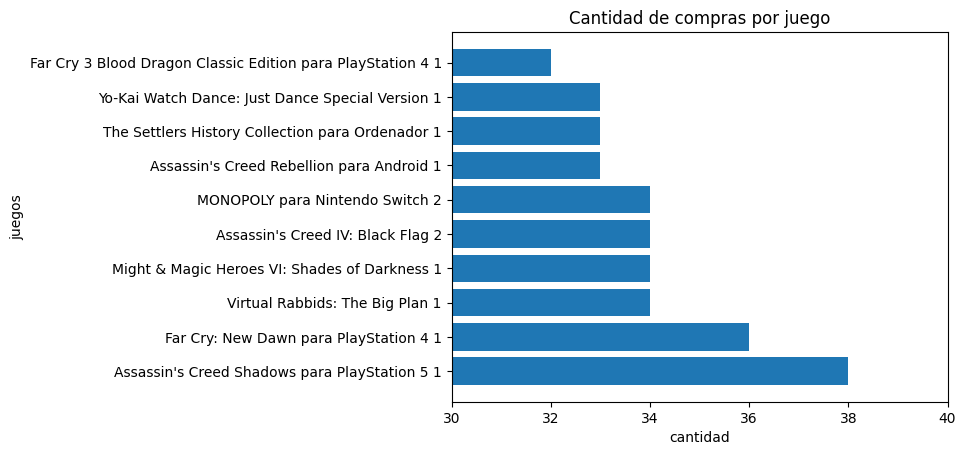

In [187]:
plt.title("Cantidad de compras por juego")
plt.barh(top10_compras_juego["nombre"], top10_compras_juego["cantidad_compras"])
plt.xlabel("cantidad")
plt.ylabel("juegos")
plt.xlim(30, 40)

plt.show()


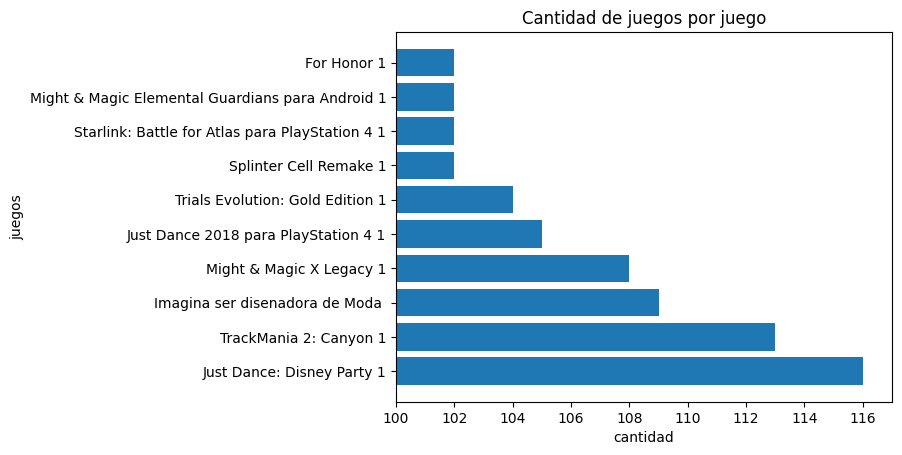

In [170]:
plt.title("Cantidad de juegos por juego")
plt.barh(top10_sesion_juego["nombre"], top10_sesion_juego["cantidad_sesiones"])
plt.xlabel("cantidad")
plt.ylabel("juegos")
plt.xlim(100,117 )

plt.show()

In [171]:

sesiones_por_juego = set(top10_sesion_juego['nombre'])
compras_por_juego = set(top10_compras_juego['nombre'])

# Intersección
juegos_en_ambos = sesiones_por_juego & compras_por_juego

print("🎮 Juegos que están tanto en el top 10 de más jugados como más comprados:")
for juego in juegos_en_ambos:
    print("-", juego)


🎮 Juegos que están tanto en el top 10 de más jugados como más comprados:


In [ ]:
#No coinciden los juegos mas jugados con los mas comprados!!
#vamos a ver los juegos jugados pero poco comprados para pensar
#si podemos mejorar la venta.

In [189]:
# Unir y calcular ratio en 1 solo bloque
comparacion = sesiones_por_juego.merge(
    compras_por_juego[['id_juego', 'cantidad_compras']],
    on='id_juego',
    how='left'
).fillna(0)

comparacion['ratio'] = comparacion['cantidad_compras'] / comparacion['cantidad_sesiones']

# Ver los más jugados con menor ratio de conversión
comparacion.sort_values('cantidad_sesiones', ascending=False).head(20).sort_values('ratio').head(5)


,id_juego,cantidad_sesiones,nombre,categoria,cantidad_compras,ratio
210,212,104,Trials Evolution: Gold Edition 1,Carreras/Plataformas,15,0.144231
16,18,102,Splinter Cell Remake 1,Sigilo/Acció,17,0.166667
310,312,98,For Honor 2,Lucha,17,0.173469
259,261,109,Imagina ser disenadora de Moda,Simulació,19,0.174312
224,226,101,Assassin's Creed III 1,Acción/Aventur,19,0.188119


In [190]:
# Ver juegos más comprados con pocas sesiones (ordenado por ratio alto)
comparacion.sort_values('cantidad_compras', ascending=False).head(20).sort_values('cantidad_sesiones').head(5)


,id_juego,cantidad_sesiones,nombre,categoria,cantidad_compras,ratio
55,57,66,Far Cry 3 Blood Dragon Classic Edition para Pl...,Acción/Aventur,32,0.484848
268,270,69,Motionsports Adrenaline 1,Deportes,32,0.463768
289,291,71,Michael Jackson: The Experience 1,Musical/Ritmo,32,0.450704
337,339,76,MONOPOLY para Nintendo Switch 2,Juegos de mesa,34,0.447368
73,75,77,Far Cry: New Dawn para PlayStation 4 1,Acción/Aventur,36,0.467532


In [ ]:
#Ratio alto, el juego se juega mucho en proporsion al uso que tiene. compras por impulso o poca retension de juego?

##### Categorias 


In [116]:
compras_por_categoria = compras.merge(juegos[['id_juego', 'categoria']], on='id_juego', how='left')


In [191]:
compras_por_categoria = compras_por_categoria.groupby('categoria').agg(
    cantidad_compras=('id_compra', 'count'),  
    monto_total=('monto', 'sum')             
).reset_index()


In [192]:
compras_por_categoria.head()

,categoria,cantidad_compras,monto_total
0,Acció,35,800.43
1,Acción/Arcad,64,1611.69
2,Acción/Aventur,1287,34666.52
3,Acción/Disparo,18,484.27
4,Acción/Estrategi,23,664.48


In [119]:
compras_stats.nlargest(10, "cantidad_compras")

,categoria,cantidad_compras,monto_total
2,Acción/Aventur,1287,34666.52
25,Estrategia,738,19910.69
41,Musical/Ritmo,639,17290.28
12,Carreras,415,10980.87
45,Plataformas,323,9114.00
29,Estrategia/Rol,318,8252.18
20,Disparos,227,6115.18
65,Sigilo/Acció,195,5461.10
21,Disparos táctico,192,5535.44
36,Lucha,186,5050.01


In [193]:
top10_cate=compras_por_categoria.nlargest(10, "monto_total")

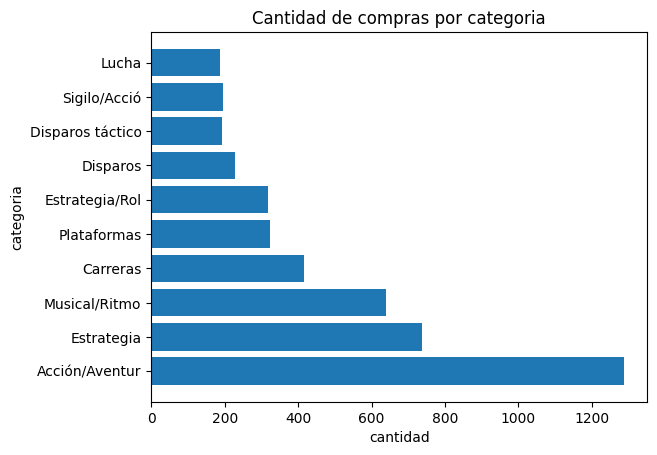

In [145]:
plt.title("Cantidad de compras por categoria")
plt.barh(top10_cate["categoria"], top10_cate["cantidad_compras"])
plt.xlabel("cantidad")
plt.ylabel("categoria")


plt.show()


In [208]:
sesiones_por_categoria = sesiones_por_juego.groupby('categoria', as_index=False)['cantidad_sesiones'].sum()


In [210]:
top_categorias_mas_jugadas = sesiones_por_categoria.nlargest(10, 'cantidad_sesiones')
print(top_categorias_mas_jugadas)


           categoria  cantidad_sesiones
2     Acción/Aventur               4630
25        Estrategia               2714
41     Musical/Ritmo               2286
12          Carreras               1485
45       Plataformas               1230
29    Estrategia/Rol               1124
20          Disparos                858
21  Disparos táctico                746
65      Sigilo/Acció                740
36             Lucha                732


In [211]:
sesiones.head()

,id_sesion,id_jugador,id_juego,fecha,anio,mes,dia
0,1,4234,221,2025-04-18,2025,4,Friday
1,2,1769,206,2025-04-05,2025,4,Saturday
2,3,1299,215,2025-06-04,2025,6,Wednesday
3,4,3078,160,2025-06-17,2025,6,Tuesday
4,5,3606,264,2025-05-08,2025,5,Thursday


In [216]:
# Contar sesiones por mes
meses_jugados = sesiones.groupby('mes').size().reset_index(name='cantidad_sesiones')

# sesiones por dia
dias_jugados = sesiones.groupby('dia').size().reset_index(name='cantidad_sesiones')
dias_jugados = dias_jugados.sort_values('dia')

print(meses_jugados)
print(dias_jugados)


   mes  cantidad_sesiones
0    3               2575
1    4              10098
2    5              10336
3    6               6990
         dia  cantidad_sesiones
0     Monday               4247
1    Tuesday               4332
2  Wednesday               4374
3   Thursday               4405
4     Friday               4382
5   Saturday               4259
6     Sunday               4000


C:\Users\yamal\AppData\Local\Temp\ipykernel_32396\2927652460.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dias_jugados = sesiones.groupby('dia').size().reset_index(name='cantidad_sesiones')


In [214]:
sesiones["mes"].unique()

array([4, 6, 5, 3], dtype=int32)

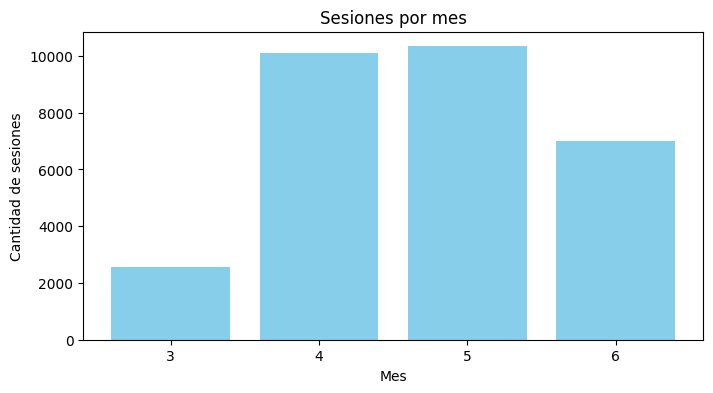

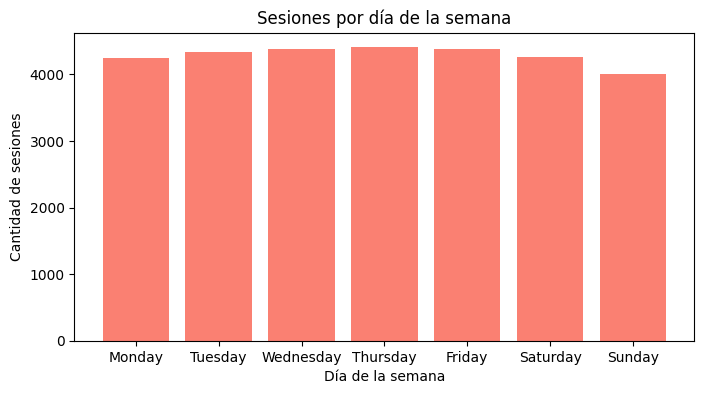

In [ ]:
#por mes
plt.figure(figsize=(8,4))
plt.bar(meses_jugados['mes'], meses_jugados['cantidad_sesiones'], color='skyblue')
plt.xlabel('Mes')
plt.ylabel('Cantidad de sesiones')
plt.title('Sesiones por mes')
plt.xticks(meses_jugados['mes'])
plt.show()

# por día de la semana
plt.figure(figsize=(8,4))
plt.bar(dias_jugados['dia'], dias_jugados['cantidad_sesiones'], color='salmon')
plt.xlabel('Día de la semana')
plt.ylabel('Cantidad de sesiones')
plt.title('Sesiones por día de la semana')
plt.show()


In [219]:
sesiones_con_pais = sesiones.merge(jugadores[['id_jugador', 'pais']], on='id_jugador', how='left')


In [220]:
sesiones_por_pais = sesiones_con_pais.groupby('pais').size().reset_index(name='cantidad_sesiones')
sesiones_por_pais = sesiones_por_pais.sort_values('cantidad_sesiones', ascending=False)
print(sesiones_por_pais)


                  pais  cantidad_sesiones
23              Brasil                380
72   Guinea Ecuatorial                227
163          Sri Lanka                221
117             México                206
165              Sudán                198
..                 ...                ...
77               India                 85
162            Somalia                 83
161           Singapur                 83
84        Islas Salom�                 69
119              Nauru                 64

[191 rows x 2 columns]


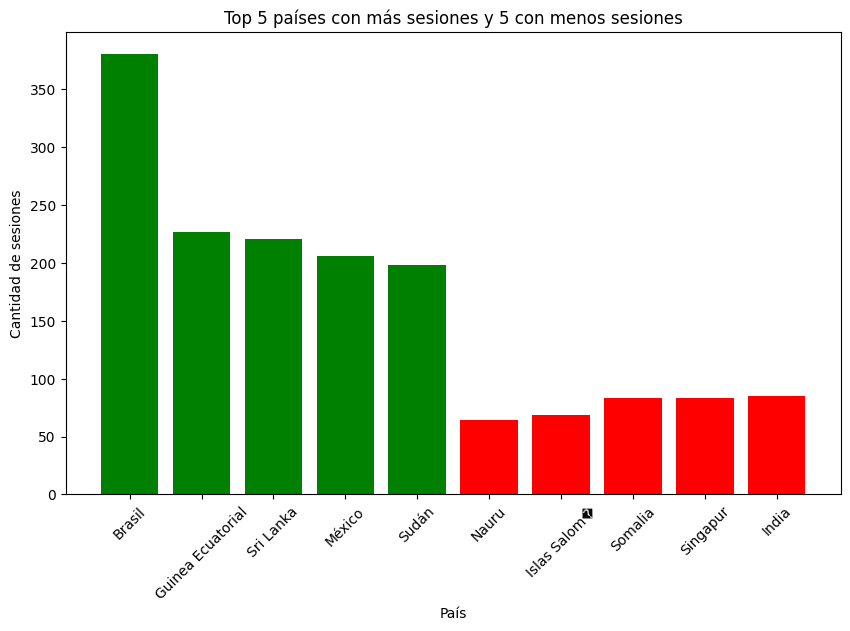

In [222]:
top_5_paises = sesiones_por_pais.nlargest(5, 'cantidad_sesiones')

bottom_5_paises = sesiones_por_pais.nsmallest(5, 'cantidad_sesiones')

paises_a_graficar = pd.concat([top_5_paises, bottom_5_paises])

plt.figure(figsize=(10,6))
plt.bar(paises_a_graficar['pais'], paises_a_graficar['cantidad_sesiones'], color=['green']*5 + ['red']*5)
plt.xlabel('País')
plt.ylabel('Cantidad de sesiones')
plt.title('Top 5 países con más sesiones y 5 con menos sesiones')
plt.xticks(rotation=45)
plt.show()


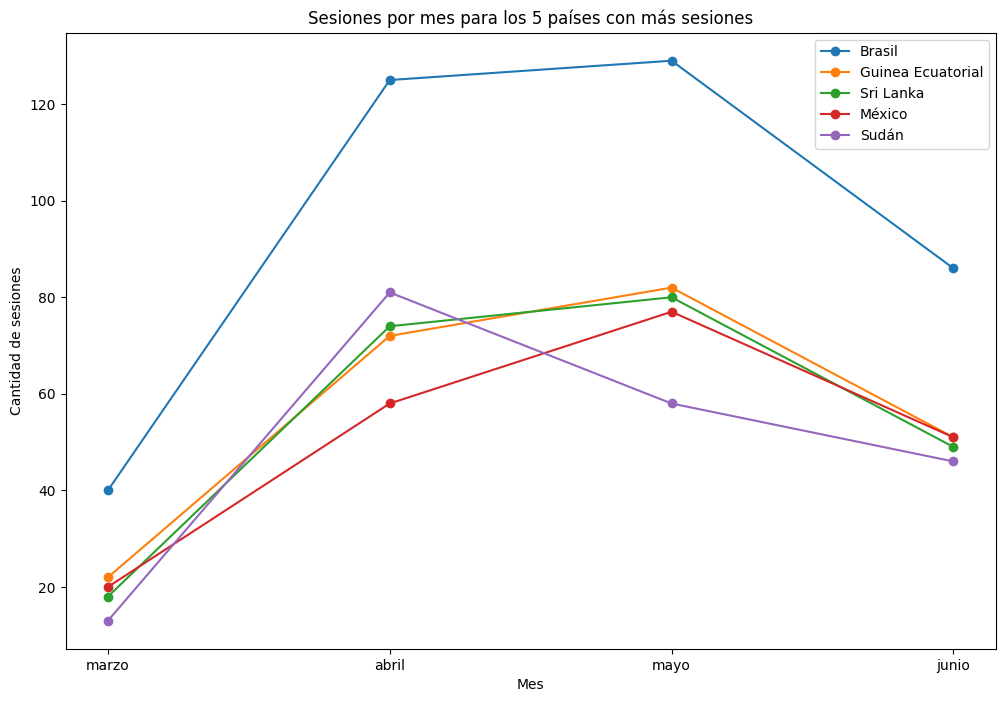

In [225]:

sesiones_con_pais = sesiones.merge(
    jugadores[['id_jugador', 'pais']],
    on='id_jugador',
    how='left'
)

sesiones_pais_mes = sesiones_con_pais.groupby(['pais', 'mes']).size().reset_index(name='cantidad_sesiones')


top_paises = sesiones_con_pais['pais'].value_counts().nlargest(5).index.tolist()

plt.figure(figsize=(12,8))

for pais in top_paises:
    datos_pais = sesiones_pais_mes[sesiones_pais_mes['pais'] == pais]
    plt.plot(datos_pais['mes'], datos_pais['cantidad_sesiones'], marker='o', label=pais)

plt.xlabel('Mes')
plt.ylabel('Cantidad de sesiones')
plt.title('Sesiones por mes para los 5 países con más sesiones')
plt.xticks([3, 4, 5, 6], ["marzo", "abril", "mayo", "junio"])
plt.legend()
plt.show()
